## UNIT 1

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import HuberRegressor
import statsmodels.formula.api as smf

df = pd.read_csv("C:/Users/bodic/Downloads/EDA_Ecommerce_Assessment.csv")

print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         3000 non-null   int64  
 1   Gender              3000 non-null   object 
 2   Age                 3000 non-null   int64  
 3   Browsing_Time       3000 non-null   float64
 4   Purchase_Amount     3000 non-null   float64
 5   Number_of_Items     3000 non-null   int64  
 6   Discount_Applied    3000 non-null   int64  
 7   Total_Transactions  3000 non-null   int64  
 8   Category            3000 non-null   object 
 9   Satisfaction_Score  3000 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 234.5+ KB
None
       Customer_ID          Age  Browsing_Time  Purchase_Amount  \
count  3000.000000  3000.000000    3000.000000      3000.000000   
mean   1500.500000    43.606000      59.868937       247.962540   
std     866.169729    14.963759    

## Histograms and Boxplots

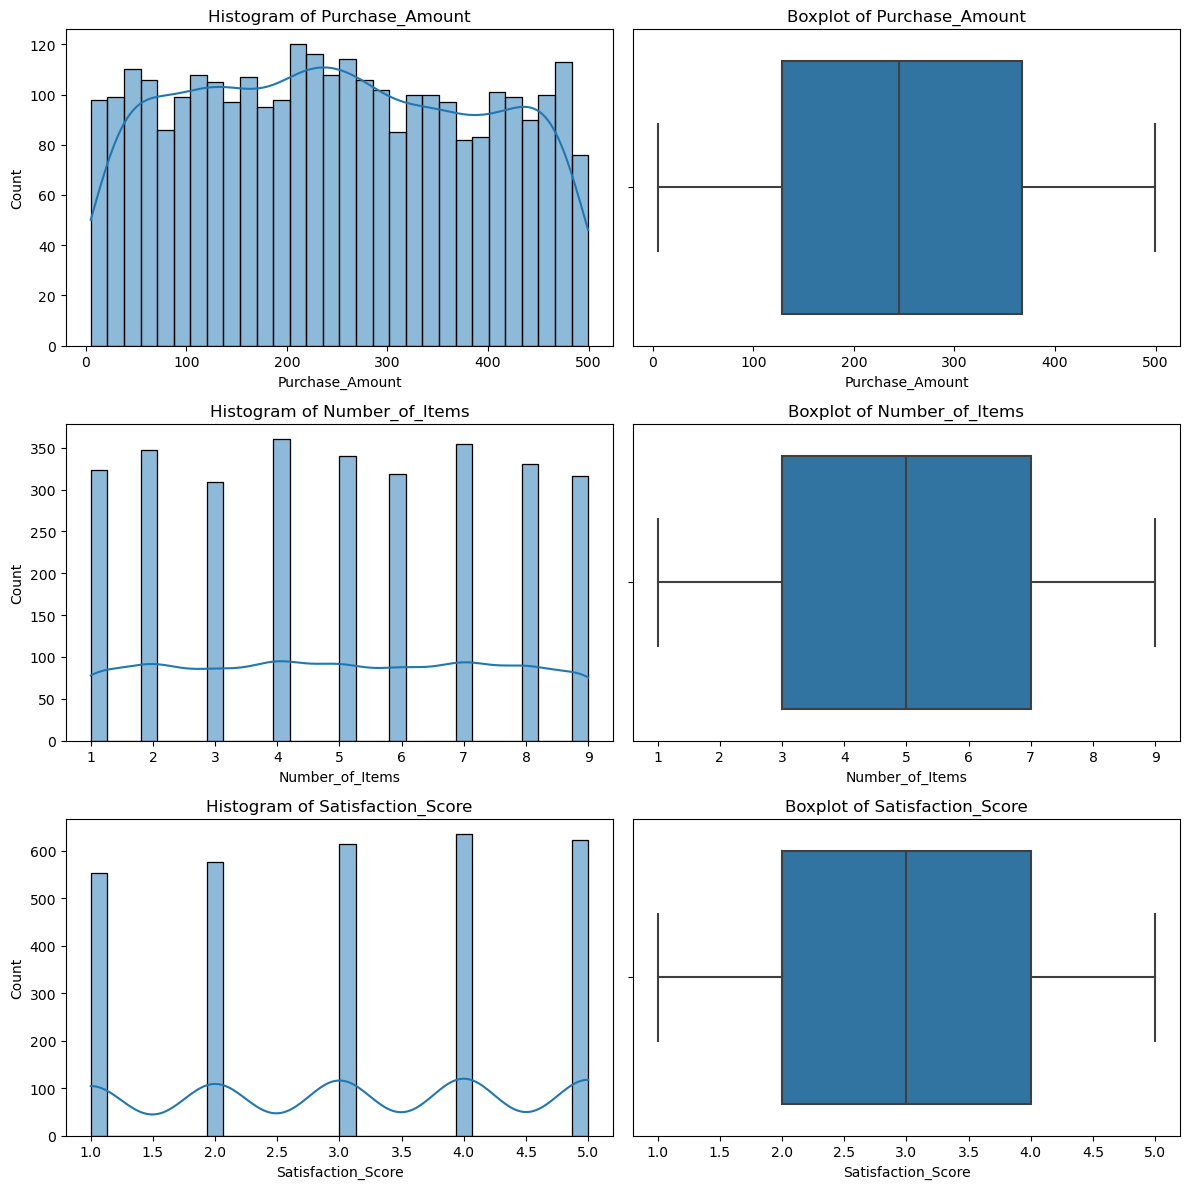

In [13]:
variables = ['Purchase_Amount', 'Number_of_Items', 'Satisfaction_Score']
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, var in enumerate(variables):
    sns.histplot(df[var], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Histogram of {var}")
    sns.boxplot(x=df[var], ax=axes[i, 1])
    axes[i, 1].set_title(f"Boxplot of {var}")

plt.tight_layout()
plt.show()

## Central tendencies and spread

In [32]:

print("Mean Purchase Amount:", df['Purchase_Amount'].mean())
print("Median Purchase Amount:", df['Purchase_Amount'].median())
print("Variance of Purchase Amount:", df['Purchase_Amount'].var())
print("Standard Deviation of Purchase Amount:", df['Purchase_Amount'].std())


Mean Purchase Amount: 247.96254
Median Purchase Amount: 245.09
Variance of Purchase Amount: 19845.986209351515
Standard Deviation of Purchase Amount: 140.87578290590443


## Log Transformation on Browsing Time

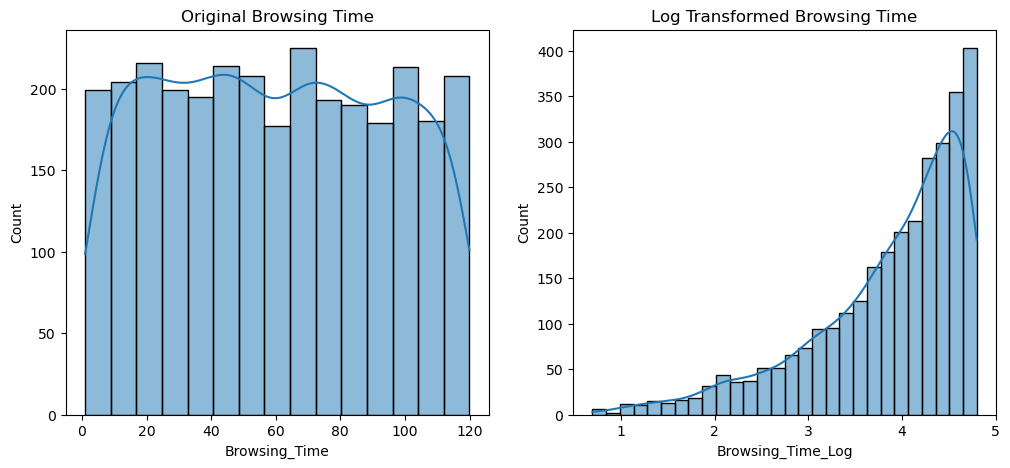

In [20]:

df['Browsing_Time_Log'] = np.log1p(df['Browsing_Time'])
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Browsing_Time'], kde=True, ax=axes[0])
axes[0].set_title("Original Browsing Time")
sns.histplot(df['Browsing_Time_Log'], kde=True, ax=axes[1])
axes[1].set_title("Log Transformed Browsing Time")
plt.show()

## Linear Regression: Purchase_Amount ~ Browsing_Time

In [22]:

X = df[['Browsing_Time']]
y = df['Purchase_Amount']
model = LinearRegression()
model.fit(X, y)
print("Linear Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Linear Regression Coefficients: [-0.07839485]
Intercept: 252.6559563839182


## Scatter Plot with Regression Line

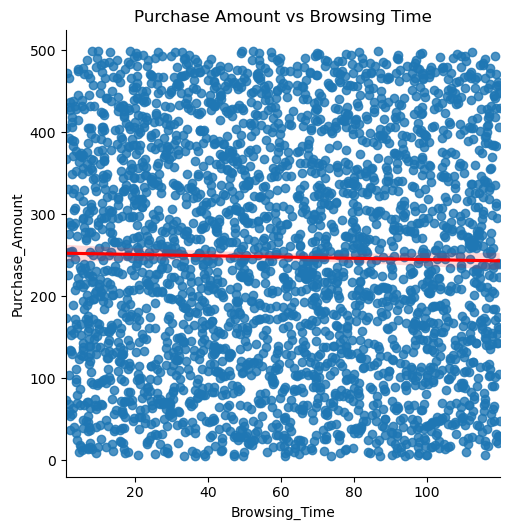

In [24]:

sns.lmplot(x='Browsing_Time', y='Purchase_Amount', data=df, line_kws={'color': 'red'})
plt.title("Purchase Amount vs Browsing Time")
plt.show()


## Interpretation
The data points are very spread out in this graph. This means there is no trend to the data; thus, there is no correlation.

# UNIT 2 : Bivariate Data Analysis

## Scatter plot: Purchase_Amount vs Number_of_Items

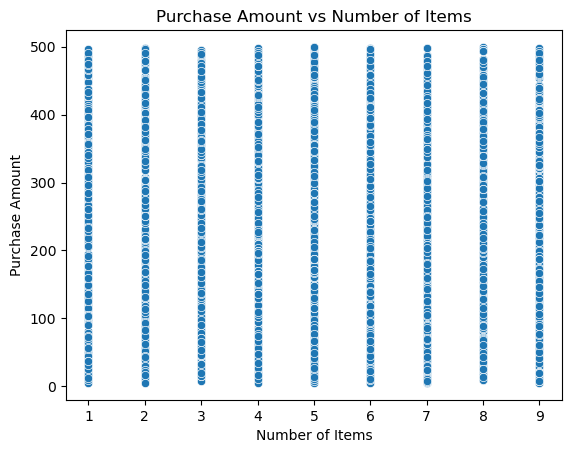

In [50]:
sns.scatterplot(x=df['Number_of_Items'], y=df['Purchase_Amount'])
plt.xlabel("Number of Items")
plt.ylabel("Purchase Amount")
plt.title("Purchase Amount vs Number of Items")
plt.show()

## Polynomial Regression: Purchase_Amount ~ Browsing_Time

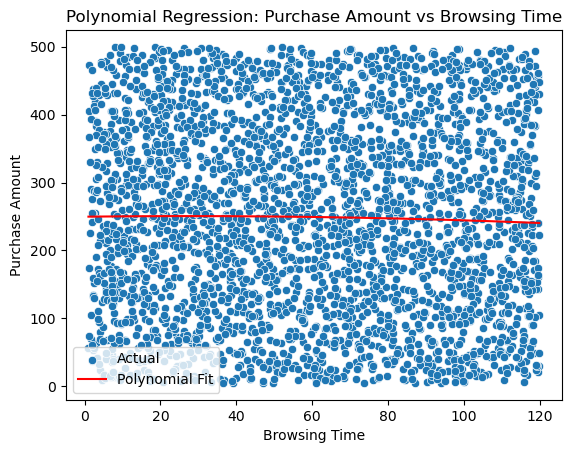

In [66]:
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(df[['Browsing_Time']], df['Purchase_Amount'])
df['Predicted_Purchase_Amount'] = poly_model.predict(df[['Browsing_Time']])

sns.scatterplot(x=df['Browsing_Time'], y=df['Purchase_Amount'], label='Actual')
sns.lineplot(x=df['Browsing_Time'], y=df['Predicted_Purchase_Amount'], color='red', label='Polynomial Fit')
plt.xlabel("Browsing Time")
plt.ylabel("Purchase Amount")
plt.title("Polynomial Regression: Purchase Amount vs Browsing Time")
plt.legend()
plt.show()

## LOESS Smoothing

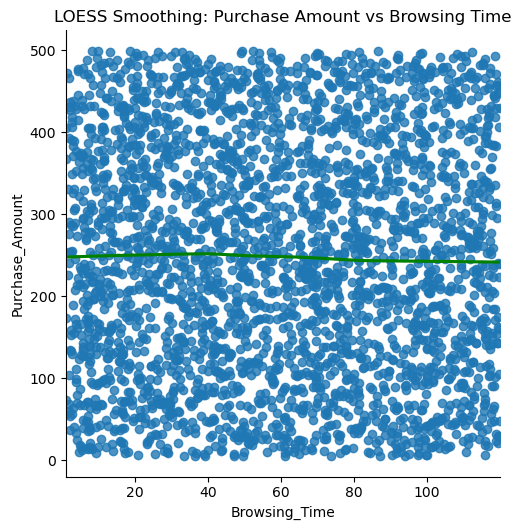

In [69]:
sns.lmplot(x='Browsing_Time', y='Purchase_Amount', data=df, lowess=True, line_kws={'color': 'green'})
plt.title("LOESS Smoothing: Purchase Amount vs Browsing Time")
plt.show()

## Robust Regression (Huber)

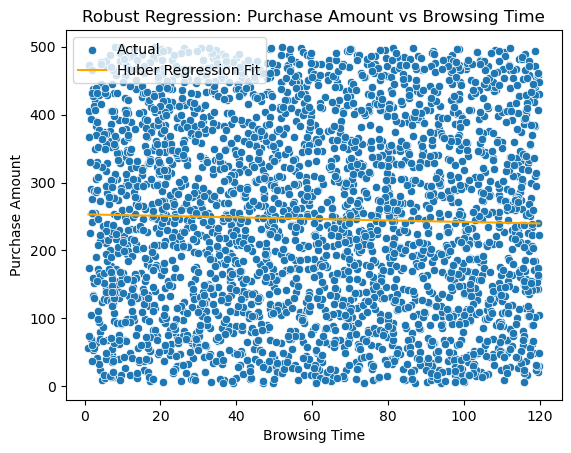

In [72]:
huber = HuberRegressor()
huber.fit(df[['Browsing_Time']], df['Purchase_Amount'])
df['Huber_Predicted'] = huber.predict(df[['Browsing_Time']])

sns.scatterplot(x=df['Browsing_Time'], y=df['Purchase_Amount'], label='Actual')
sns.lineplot(x=df['Browsing_Time'], y=df['Huber_Predicted'], color='orange', label='Huber Regression Fit')
plt.xlabel("Browsing Time")
plt.ylabel("Purchase Amount")
plt.title("Robust Regression: Purchase Amount vs Browsing Time")
plt.legend()
plt.show()


# Unit 3: Trivariate/Hypervariate Data Analysis

## Interaction Effects: Browsing_Time and Category on Purchase_Amount

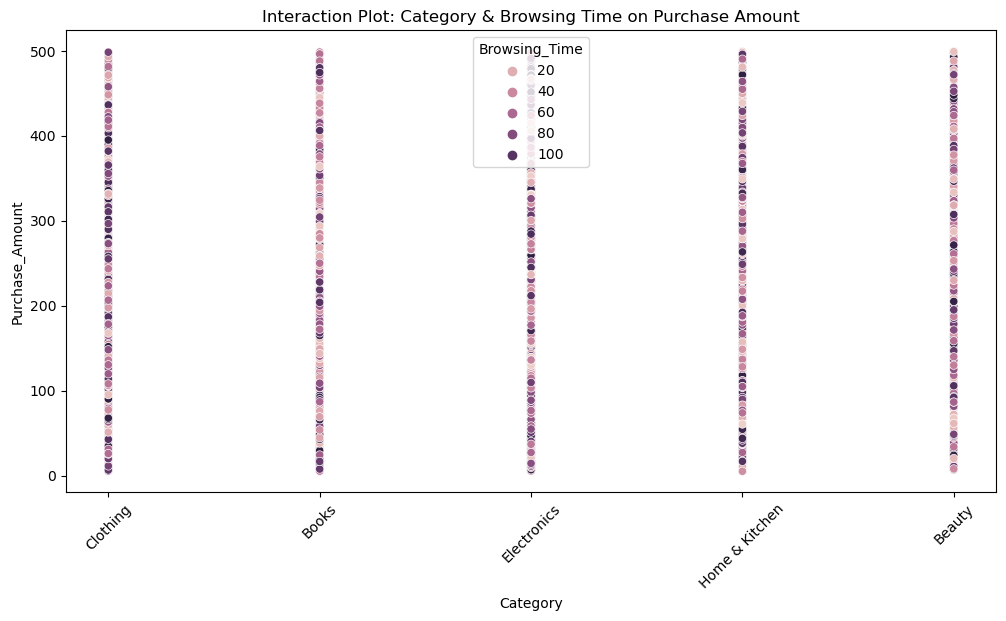

In [84]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Category', y='Purchase_Amount', hue='Browsing_Time', data=df)
plt.xticks(rotation=45)
plt.title("Interaction Plot: Category & Browsing Time on Purchase Amount")
plt.show()

## Coplots of Purchase_Amount vs Browsing_Time across Categories

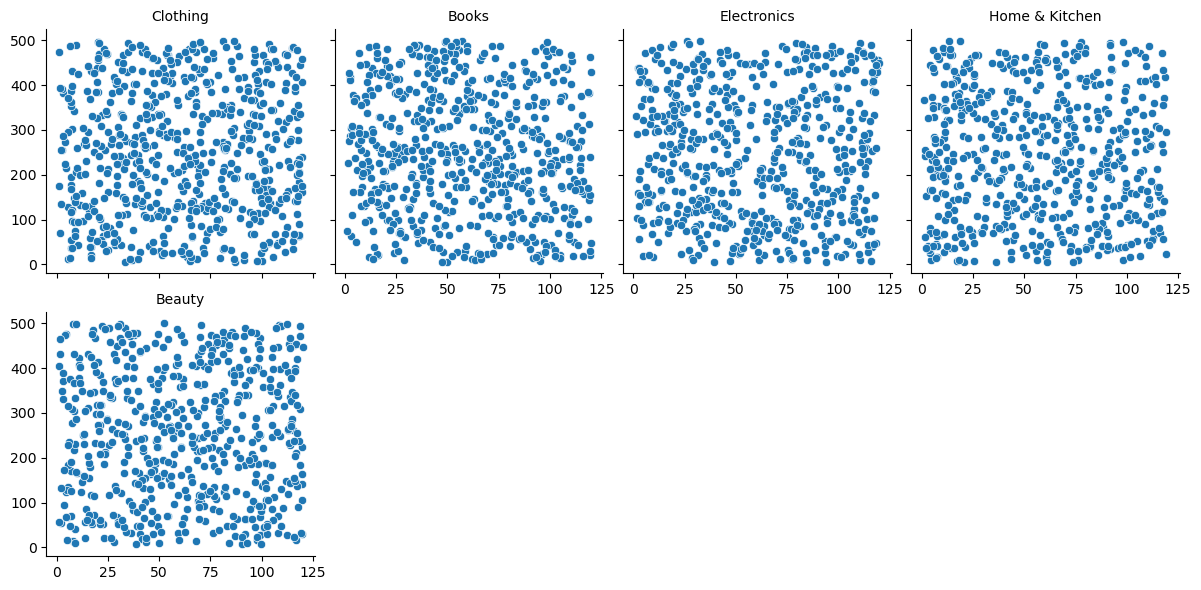

In [87]:
g = sns.FacetGrid(df, col="Category", col_wrap=4, height=3)
g.map_dataframe(sns.scatterplot, x="Browsing_Time", y="Purchase_Amount")
g.set_titles(col_template="{col_name}")
plt.show()

## Contour Plot: Browsing_Time, Number_of_Items, and Purchase_Amount

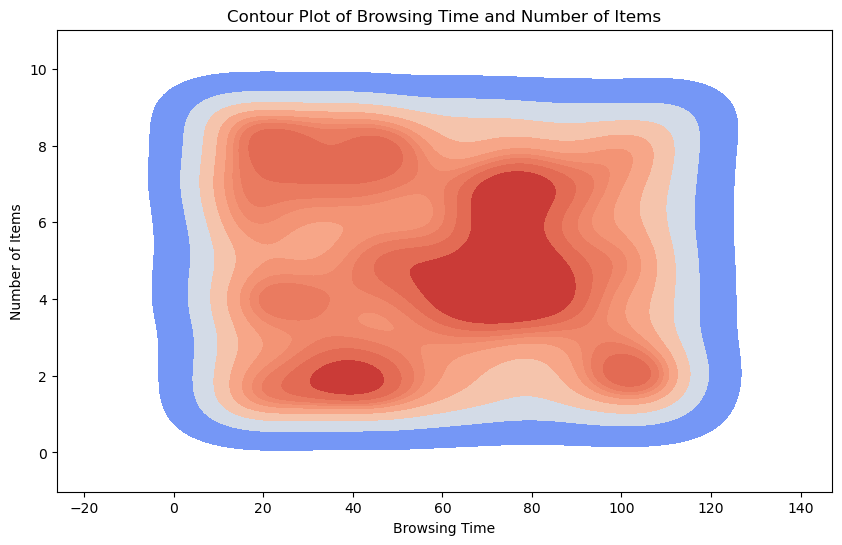

In [90]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['Browsing_Time'], y=df['Number_of_Items'], fill=True, cmap='coolwarm')
plt.xlabel("Browsing Time")
plt.ylabel("Number of Items")
plt.title("Contour Plot of Browsing Time and Number of Items")
plt.show()


## Multiple Regression: Purchase_Amount ~ Browsing_Time + Number_of_Items + Satisfaction_Score

In [95]:
formula = "Purchase_Amount ~ Browsing_Time + Number_of_Items + Satisfaction_Score"
model = smf.ols(formula, data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7928
Date:                Wed, 19 Mar 2025   Prob (F-statistic):              0.498
Time:                        20:38:15   Log-Likelihood:                -19099.
No. Observations:                3000   AIC:                         3.821e+04
Df Residuals:                    2996   BIC:                         3.823e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            261.3499      9